# SHAP Example for regression models

https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html

In [1]:
import sklearn as sklearn
import shap as shap
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from collections import defaultdict 

In [2]:
# a classic housing price dataset
#X, y = shap.datasets.california()
X, y = shap.datasets.california(n_points=1000)

# Linear Regression

In [3]:
# a simple linear model
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

## Examining the model coefficients:

The most common way of understanding a linear model is to examine the coefficients learned for each feature. These coefficients tell us how much the model output changes when we change each of the input features:

In [4]:
print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", model.coef_[i].round(5))

Model coefficients:

MedInc = 0.42563
HouseAge = 0.01033
AveRooms = -0.1161
AveBedrms = 0.66385
Population = 3e-05
AveOccup = -0.26096
Latitude = -0.46734
Longitude = -0.46272


# Get correlation based feature importance

In [5]:
correl_importance = {'Feature':[], 'Corr_Importance':[]}
for i, feat_name in enumerate(X.columns):
    feat_vec = X.iloc[:,i].to_numpy()
    label_vec = y
    corr_coeff = abs(np.corrcoef(x=feat_vec, y=label_vec)[0,1])
    correl_importance['Feature'].append(feat_name)
    correl_importance['Corr_Importance'].append(corr_coeff)
correl_importance_df = pd.DataFrame(correl_importance).sort_values(by='Corr_Importance',ascending=False)
correl_importance_df

,Feature,Corr_Importance
0,MedInc,0.670247
5,AveOccup,0.240931
6,Latitude,0.148331
1,HouseAge,0.118295
2,AveRooms,0.106960
7,Longitude,0.047355
4,Population,0.045764
3,AveBedrms,0.043372


<Axes: xlabel='Corr_Importance', ylabel='Feature'>

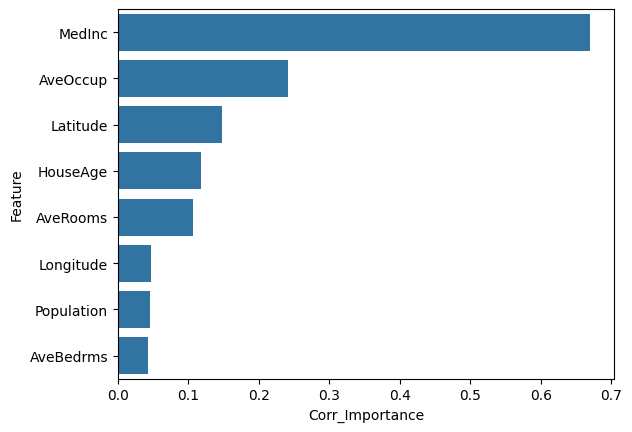

In [6]:
sns.barplot(data=correl_importance_df, x='Corr_Importance', y='Feature')

# For each feature, get the average Shapley value across all observations

In [7]:
# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, X)
shap_values = explainer(X)

In [8]:
display(X.columns)
display(np.mean(np.abs(shap_values.values), axis=0))
display(shap_values.values.shape)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

array([0.57709811, 0.10989838, 0.14453508, 0.10373879, 0.02207548,
       0.15413767, 0.93398628, 0.84041235])

(1000, 8)

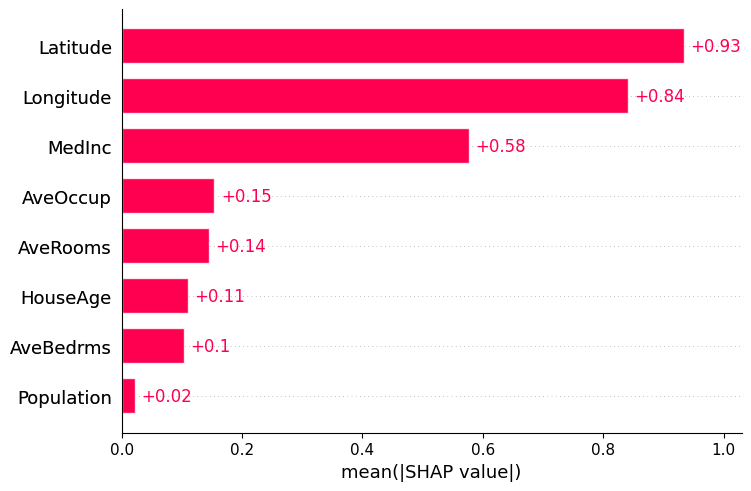

In [9]:
shap.plots.bar(shap_values)

# For each feature, get the Shapley value for the observation at index obs_idx

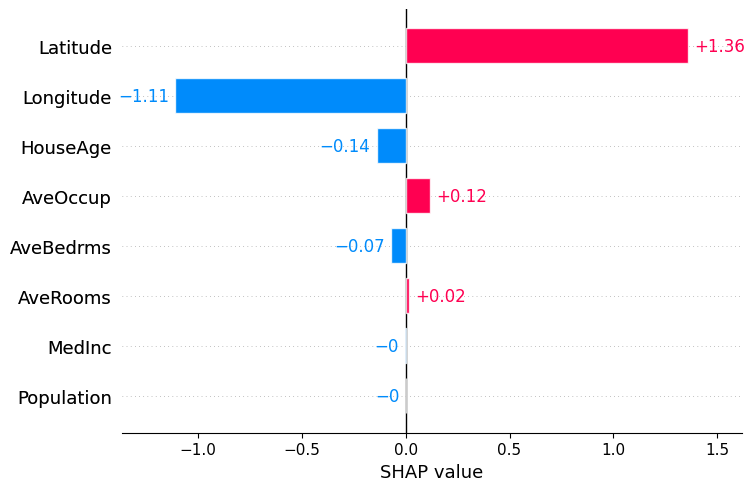

In [10]:
obs_idx = 100
shap.plots.bar(shap_values[obs_idx])

In [11]:
display(X.columns)
display(shap_values[obs_idx,:].values)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

array([-2.38523126e-03, -1.39413799e-01,  1.66062760e-02, -7.10993006e-02,
       -6.75471434e-04,  1.18244999e-01,  1.35808434e+00, -1.10825130e+00])